In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

The height and width 877 1227


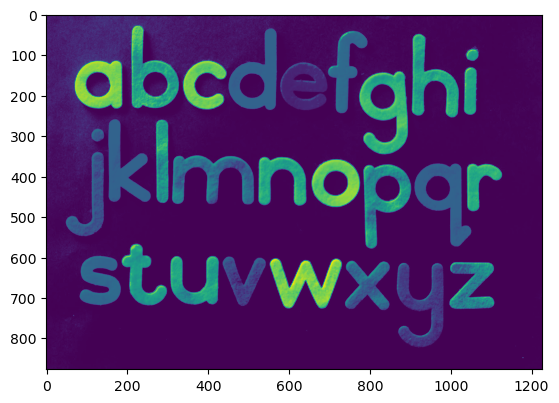

In [3]:

img=cv2.imread('Program-2.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(img)
img.shape
height,width=img.shape[:2]
print("The height and width",height,width)

In [47]:
from scipy.signal import convolve2d

In [49]:
def apply_gaussian_filter(image_path, kernel_size=5, sigma=1):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("Error: Unable to load image.")
        return
    
    # builtin qaussian Blur
    gaussian_blur = cv2.GaussianBlur(img, (kernel_size, kernel_size), sigma)
    
    # userdefined qaussian filter
    kernel = cv2.getGaussianKernel(kernel_size, sigma)
    gaussian_kernel = np.outer(kernel, kernel)
    gaussian_blur_custom = convolve2d(img, gaussian_kernel, mode='same', boundary='fill', fillvalue=0)
    
    return img, gaussian_blur, gaussian_blur_custom

def apply_box_filter(image_path, kernel_size=5):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # builtin Box Filter
    box_blur = cv2.blur(img, (kernel_size, kernel_size))
    gaussian_blur = cv2.GaussianBlur(img, (kernel_size, kernel_size), 1)
    
    return img, box_blur, gaussian_blur

def apply_laplacian_filter(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # builtin Laplacian Filter
    laplacian = cv2.Laplacian(img, cv2.CV_64F)
    laplacian = np.uint8(np.absolute(laplacian))
    
    # userdefined Laplacian kernel
    laplacian_kernel = np.array([[0, -1, 0],
                                  [-1, 4, -1],
                                  [0, -1, 0]])
    laplacian_custom = convolve2d(img, laplacian_kernel, mode='same', boundary='fill', fillvalue=0)
    
    return img, laplacian, laplacian_custom

def apply_bilateral_filter(image_path, d=9, sigma_color=75, sigma_space=75):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    bilateral_filtered = cv2.bilateralFilter(img, d, sigma_color, sigma_space)
    return img, bilateral_filtered

def apply_high_boost_filter(image_path, alpha=1.5):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    blurred = cv2.GaussianBlur(img, (5, 5), 1)
    mask = img - blurred
    high_boosted = cv2.addWeighted(img, alpha, mask, 1, 0)
    return img, high_boosted

def display_images(title, images, labels):
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(labels[i])
        plt.axis('off')
    plt.show()

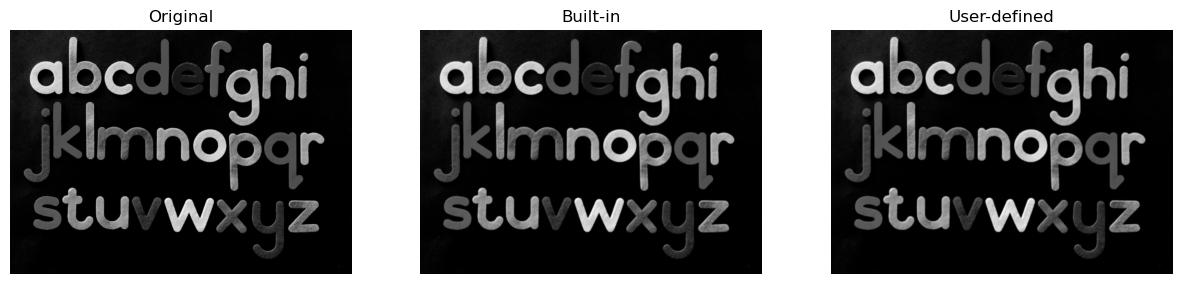

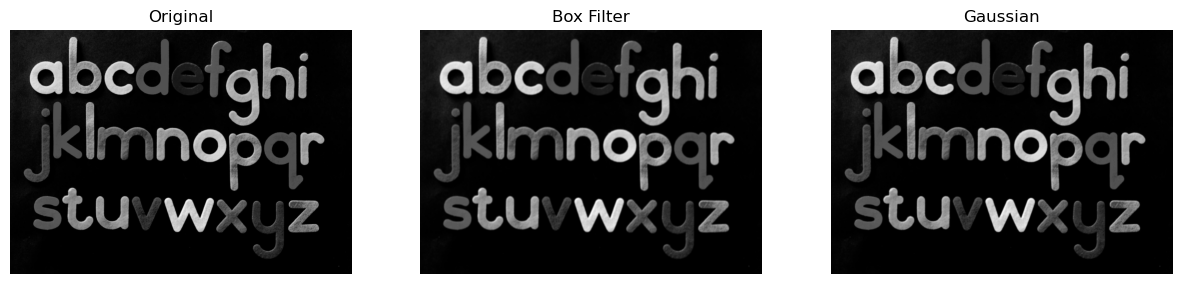

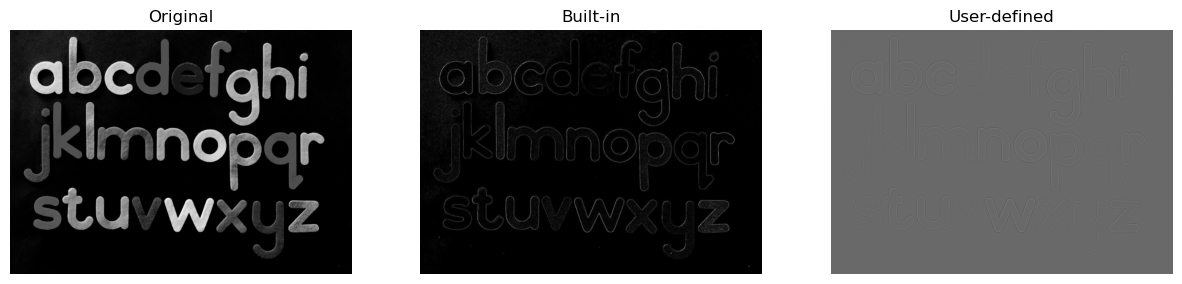

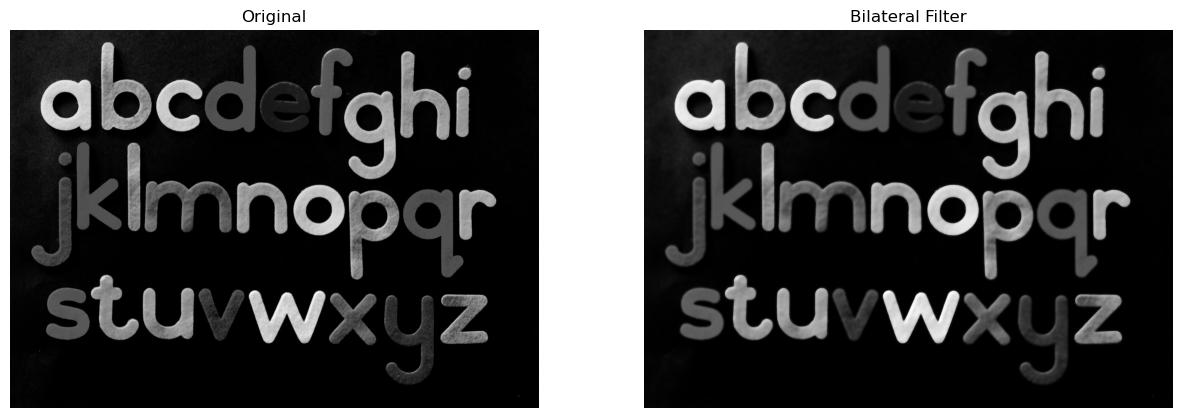

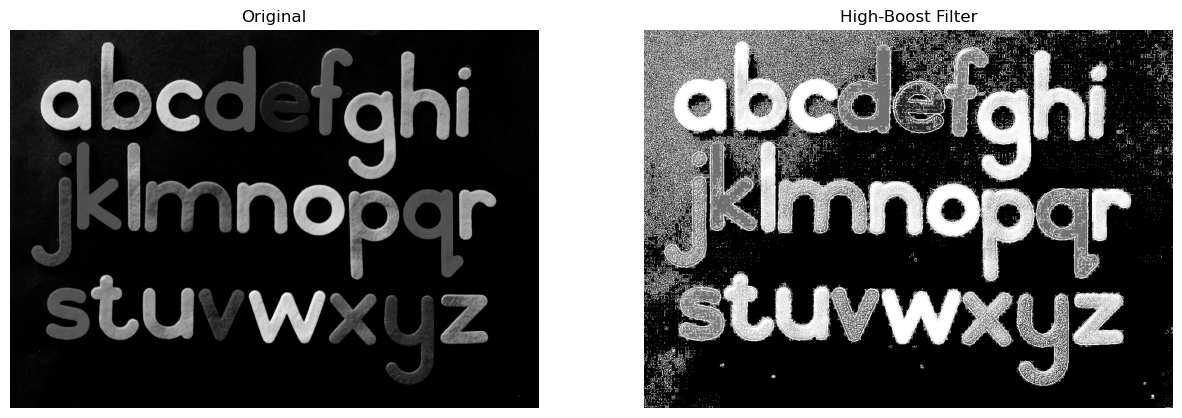

In [51]:

image_path = 'Program-2.jpg' 

#gaussian
g_img, g_builtin, g_custom = apply_gaussian_filter(image_path)
display_images("Gaussian Filter", [g_img, g_builtin, g_custom], ["Original", "Built-in", "User-defined"])

#box
b_img, b_box, b_gaussian = apply_box_filter(image_path)
display_images("Box Filter vs Gaussian", [b_img, b_box, b_gaussian], ["Original", "Box Filter", "Gaussian"])

#laplacian filter
l_img, l_builtin, l_custom = apply_laplacian_filter(image_path)
display_images("Laplacian Edge Enhancement", [l_img, l_builtin, l_custom], ["Original", "Built-in", "User-defined"])

#bilateral filter for Noise Reduction
bf_img, bf_filtered = apply_bilateral_filter(image_path)
display_images("Bilateral Filter", [bf_img, bf_filtered], ["Original", "Bilateral Filter"])

#high-Boost Filter for Contrast Enhancement
hb_img, hb_filtered = apply_high_boost_filter(image_path)
display_images("High-Boost Filtering", [hb_img, hb_filtered], ["Original", "High-Boost Filter"])


### A Gaussian filter is a suitable choice because it effectively reduces high-frequency noise while preserving the overall structure of the image.

Implementation using Built-in and User-defined Functions
Built-in Function: Use cv2.GaussianBlur()
User-defined Function: Implement Gaussian filtering using a convolution kernel.

### Effect of Box Filter and Alternative Approach (5M)
A Box Filter (or average filter) blurs the image but also reduces sharpness, making it harder to detect fractures.
To minimize this effect, we use a Gaussian filter, which smooths noise while preserving edges better than a simple box filter.

### Enhancing Edge Contrast using a Linear Filter (5M)
A Laplacian filter is effective for edge enhancement as it highlights regions of rapid intensity change (useful for detecting fractures).

Built-in Function: Use cv2.Laplacian()
User-defined Function: Apply a Laplacian kernel manually using convolution.